In [1]:
# following along with https://elitedatascience.com/keras-tutorial-deep-learning-in-python

### Step 3: Import libraries and modules

In [2]:
# importing numpy and setting a seed for reproductibility
import numpy as np
np.random.seed(123)  # for reproducibility

In [3]:
# importing standart keras modules/layers/utilities
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

Using TensorFlow backend.


### Step 4: Load image data form MNIST

In [4]:
from keras.datasets import mnist

# Load pre-shuffled MNIST data into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [5]:
print X_train.shape

(60000, 28, 28)


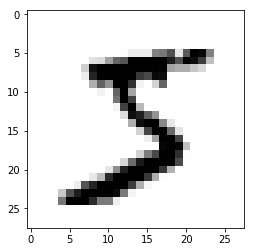

In [6]:
from matplotlib import pyplot as plt
%matplotlib inline
# ^ show stuff inline
plt.imshow(X_train[0], cmap=plt.cm.binary) #"cmap=plt.cm.binary" used to make image b/w

### Step 5: Preprocess input data for Keras

In [7]:
# old shape (currently # of samples, height, width)
print X_train.shape

(60000, 28, 28)


In [8]:
# explicitly declaring the depth dimension
# need shape to look like # of samples, depth, height, width
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28)
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28)

In [9]:
# new shape
print X_train.shape

(60000, 1, 28, 28)


In [10]:
# Convert data type
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
# normalize values
X_train /= 255
X_test /= 255

### Step 6: Preprocess class labels for Keras

In [12]:
# taking a look at the shape of our class label data
print y_train.shape

(60000,)


In [13]:
# expecting 10 classes (one for each digit)

In [14]:
# looking at labels for first 10 training samples
print y_train[:10]

[5 0 4 1 9 2 1 3 1 4]


In [15]:
# preprocess class labels
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [16]:
# resulting shape
print Y_train.shape

(60000, 10)


### Step 7: Define model architecture

In [17]:
# using a pre-defined / proven architecture for this
# declare sequential model
model = Sequential()

In [18]:
# declare CNN input layer
# added dim_ordering='th' since i'm using tensorflow and it has different ways of ordering dimensions
# model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), dim_ordering='th'))
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(1,28,28), data_format="channels_first"))

In [19]:
print model.output_shape

(None, 32, 26, 26)


In [20]:
# adding more layers to model
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [21]:
# fully connected dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

### Step 8. Compile model

In [84]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Step 8.5. Validation set

In [85]:
# Create %20 validation set
X_val = X_train[:(len(X_train)/5)]
partial_X_train = X_train[(len(X_train)/5):]

Y_val = Y_train[:(len(X_train)/5)]
partial_Y_train = Y_train[(len(X_train)/5):]

### Step 9: Fit model on training data

In [86]:
# normal
# history = model.fit(X_train, Y_train, batch_size=32, epochs=2, verbose=1)

In [87]:
history = model.fit(partial_X_train,
                    partial_Y_train,
                    epochs=5,
                    batch_size=32,
                    verbose=1,
                    validation_data=(X_val, Y_val))

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 204s 4ms/step - loss: 0.0337 - acc: 0.9897 - val_loss: 0.0249 - val_acc: 0.9927
Epoch 2/5
48000/48000 [==============================] - 202s 4ms/step - loss: 0.0324 - acc: 0.9896 - val_loss: 0.0228 - val_acc: 0.9936
Epoch 3/5
48000/48000 [==============================] - 202s 4ms/step - loss: 0.0312 - acc: 0.9897 - val_loss: 0.0243 - val_acc: 0.9932
Epoch 4/5
48000/48000 [==============================] - 203s 4ms/step - loss: 0.0293 - acc: 0.9907 - val_loss: 0.0292 - val_acc: 0.9925
Epoch 5/5
48000/48000 [==============================] - 203s 4ms/step - loss: 0.0261 - acc: 0.9917 - val_loss: 0.0305 - val_acc: 0.9919


In [88]:
print(history.history.keys())

['acc', 'loss', 'val_acc', 'val_loss']


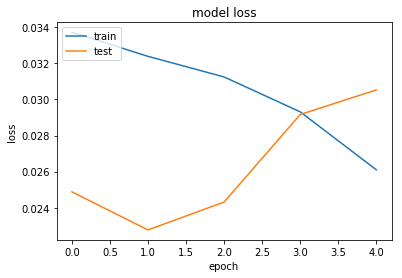

In [89]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Step 10: Evaluate model on test data

In [93]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [94]:
print score

[0.029775017116827347, 0.99070000000000003]


### Goal: Unshape image to look at, then predict on

In [97]:
test_image = X_test[999]

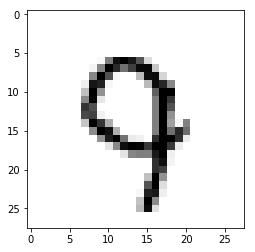

In [98]:
# view test_image (undoing the transformation on a copy)
test_image_in = test_image
test_image_in *= 255
test_image_in = test_image_in.reshape(28, 28)
plt.imshow(test_image_in, cmap=plt.cm.binary)

In [99]:
# predict on thing

In [100]:
model.predict_classes(test_image[np.newaxis, :, :, :])

array([9])

In [101]:
model.predict(test_image[np.newaxis, :, :, :])

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]], dtype=float32)

### Save Model

In [102]:
break

SyntaxError: 'break' outside loop (<ipython-input-102-b20fcc2397e7>, line 1)

In [103]:
model.save('mnist_model.h5')